## Import libraries required for analysis

In [1]:
from change_detection import functions as chg
from lib.outliers import *  #This is copied into the local folder from a branch ebmdatalab pandas library - it will be placed in its own repo to install at a later dat

## Run change detection for the 3 OpenPrescribing opioid measures
- looks for changes in time-series data
- as described in https://www.bmj.com/content/367/bmj.l5205

In [2]:
opioids_class = chg.ChangeDetection('ccg_data_opioid%',
                                    measure=True,
                                    direction='down',
                                    use_cache=True,
                                    overwrite=False,
                                    verbose=False,
                                    draw_figures='no')
opioids_class.run()

Using cached data


## Import results of change detection

In [3]:
opioids = opioids_class.concatenate_outputs()
opioids.head()

is.nbreak  is.tfirst  is.tfirst.pknown  \
measure            name                                           
ccg_data_opioidome 00C   0         NaN        NaN                 
                   00D   0         NaN        NaN                 
                   00J   0         NaN        NaN                 
                   00K   0         NaN        NaN                 
                   00L   0         NaN        NaN                 

                         is.tfirst.pknown.offs  is.tfirst.offs  is.tfirst.big  \
measure            name                                                         
ccg_data_opioidome 00C  NaN                    NaN             NaN              
                   00D  NaN                    NaN             NaN              
                   00J  NaN                    NaN             NaN              
                   00K  NaN                    NaN             NaN              
                   00L  NaN                    NaN             NaN              

                         is.slope.ma  is.slope.ma.prop  is.slope.ma.prop.lev  \
measure            name                                                        
ccg_data_opioidome 00C  NaN          NaN               NaN                     
                   00D  NaN          NaN               NaN                     
                   00J  NaN          NaN               NaN                     
                   00K  NaN          NaN               NaN                     
                   00L  NaN          NaN               NaN                     

                         is.intlev.initlev  is.intlev.finallev  \
measure            name                                          
ccg_data_opioidome 00C  NaN                NaN                   
                   00D  NaN                NaN                   
                   00J  NaN                NaN                   
                   00K  NaN                NaN                   
                   00L  NaN                NaN                   

                         is.intlev.levd  is.intlev.levdprop  
measure            name                                      
ccg_data_opioidome 00C  NaN             NaN                  
                   00D  NaN             NaN                  
                   00J  NaN             NaN                  
                   00K  NaN             NaN                  
                   00L  NaN             NaN

# Results
These are filtered:
- to only include CCGs that started within the highest 20% of all CCGs
- to remove any CCGs that have a short sudden spike that would lead the change detection algorithm to detect a sudden drop

and then sorted according to the largest total measured drop.

## Total Oral Morphine Equivalence
https://openprescribing.net/measure/opioidome

,Month when change detected,Measured proportional change,plots
link,,,
NHS VALE ROYAL CCG,12.0,0.305159,
NHS GREAT YARMOUTH AND WAVENEY CCG,27.0,0.263200,
"NHS HEYWOOD, MIDDLETON AND ROCHDALE CCG",33.0,0.256618,
NHS HASTINGS AND ROTHER CCG,31.0,0.244477,
"NHS EASTBOURNE, HAILSHAM AND SEAFORD CCG",24.0,0.228806,
NHS NORTH TYNESIDE CCG,39.0,0.189380,
NHS SOUTH TYNESIDE CCG,30.0,0.187240,
NHS DONCASTER CCG,27.0,0.160030,
NHS BOLTON CCG,27.0,0.149190,

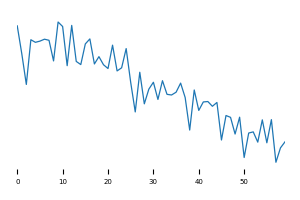
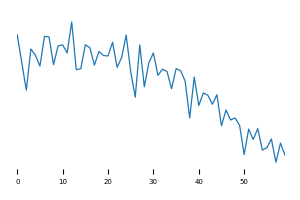
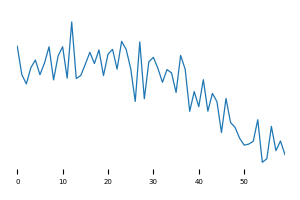
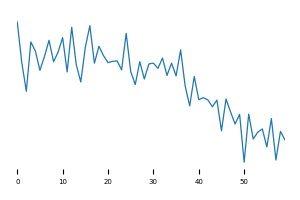
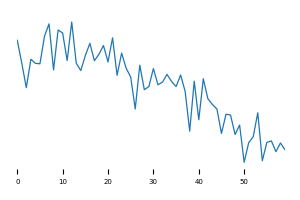
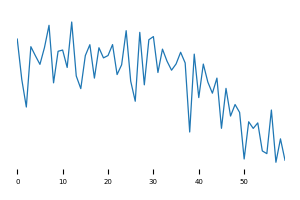
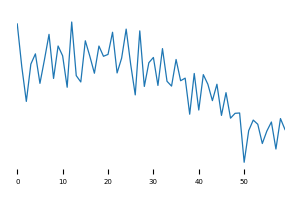
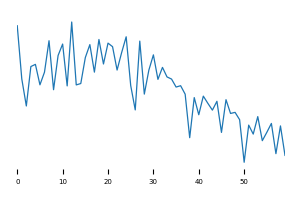
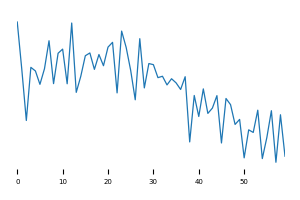
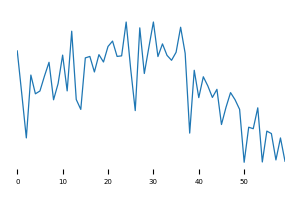

In [4]:
filtered_sparkline(opioids,
                   'ccg_data_opioid/ccg_data_opioidome',
                   'ccg_data_opioidome')

## High dose opioids as percentage regular opioids

https://openprescribing.net/measure/opioidspercent

,Month when change detected,Measured proportional change,plots
link,,,
NHS NORTH TYNESIDE CCG,47.0,0.401453,
NHS GREAT YARMOUTH AND WAVENEY CCG,43.0,0.332307,
"NHS HEYWOOD, MIDDLETON AND ROCHDALE CCG",47.0,0.326709,
NHS SOUTH WEST LINCOLNSHIRE CCG,10.0,0.259783,
NHS SOUTHEND CCG,47.0,0.255134,
NHS WIGAN BOROUGH CCG,49.0,0.209128,
NHS SOUTH TEES CCG,9.0,0.193872,
NHS BRADFORD DISTRICTS CCG,24.0,0.182914,
NHS WYRE FOREST CCG,43.0,0.178563,

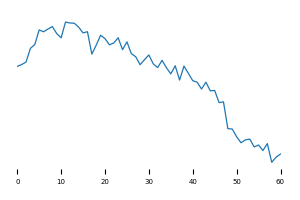
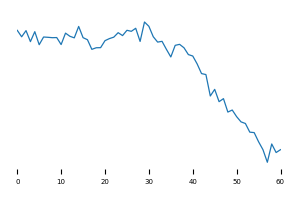
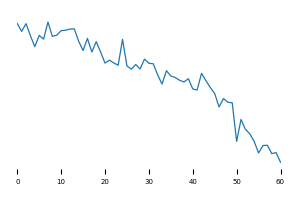
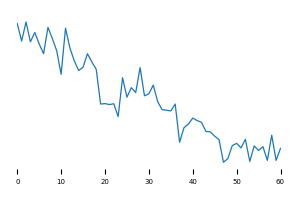
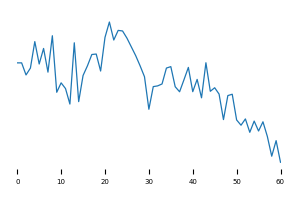
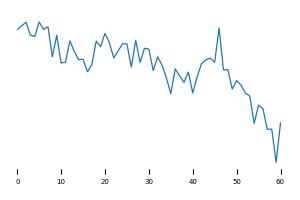
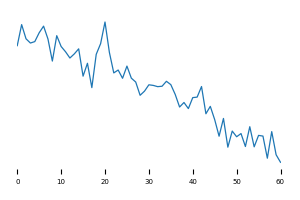
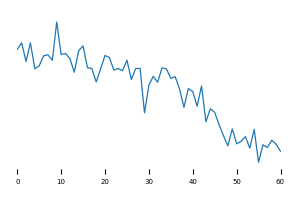
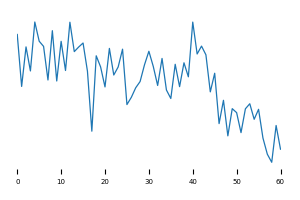
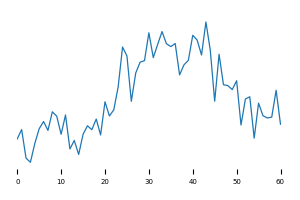

In [5]:
filtered_sparkline(opioids,
                   'ccg_data_opioid/ccg_data_opioidspercent',
                   'ccg_data_opioidspercent')

## High dose opioids per 1000 patients

https://openprescribing.net/measure/opioidper1000

,Month when change detected,Measured proportional change,plots
link,,,
NHS GREAT YARMOUTH AND WAVENEY CCG,33.0,0.392430,
NHS HASTINGS AND ROTHER CCG,39.0,0.388705,
"NHS HEYWOOD, MIDDLETON AND ROCHDALE CCG",33.0,0.380987,
NHS SOUTH TYNESIDE CCG,24.0,0.369762,
NHS SALFORD CCG,32.0,0.360949,
NHS NORTH TYNESIDE CCG,40.0,0.358933,
NHS DARLINGTON CCG,35.0,0.221148,
NHS SOUTH WEST LINCOLNSHIRE CCG,18.0,0.217694,
NHS NORTH KIRKLEES CCG,12.0,0.166284,

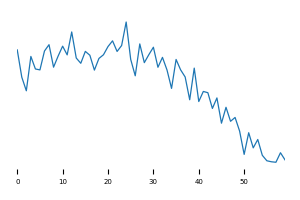
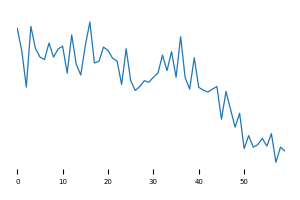
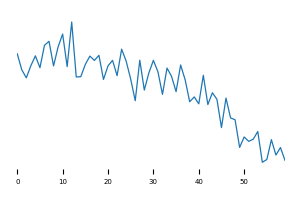
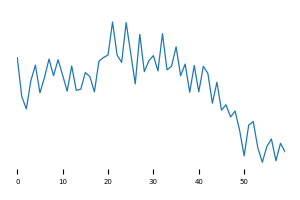
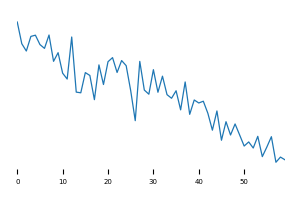
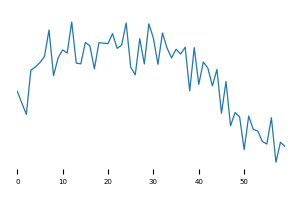
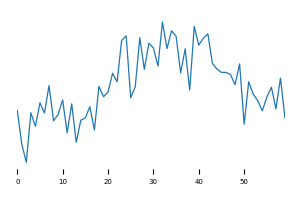
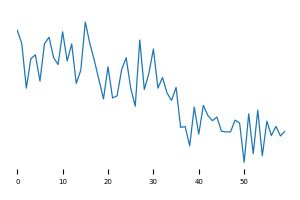
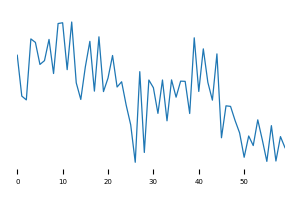
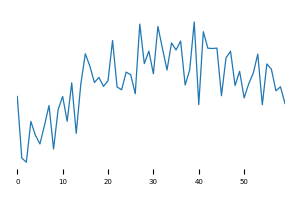

In [6]:
filtered_sparkline(opioids,
                   'ccg_data_opioid/ccg_data_opioidper1000',
                   'ccg_data_opioidper1000')